In [172]:
from __future__ import absolute_import, print_function, unicode_literals
import sys
import os
import repackage
repackage.up(stepup=2)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import analysis2 as a2
from flutype.models import Spot
import django
django.setup()
from importlib import reload


In [173]:
reload(a2)
studies = ["elisa_2018_03_28"]
spots_dj = Spot.objects.filter(raw_spot__raw_spot_collection__studies__sid__in=studies)


In [174]:
len(spots_dj)

1152

In [175]:
data = a2.Data(spots_dj=spots_dj)#.outlier_filtering().sample_on_collection(20).clean()


In [176]:
model_pca = data1.x_lda_fit()
test_data = model_pca.transform(data1.x)


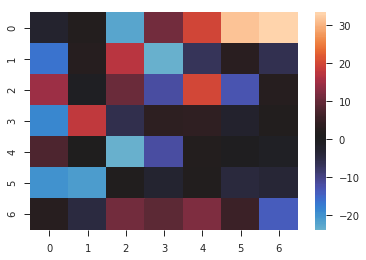

In [177]:
model_pca.coef_
sns.heatmap(model_pca.scalings_, center=True)

In [178]:
data1.x.columns


Index(['Buffer001', 'P052-0.3', 'P079-0.3', 'P116-0.3', 'P124-0.3', 'P130-0.3',
       'P135-0.3'],
      dtype='object', name='Ligand Batch')

In [179]:
import numpy as np
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
print (__version__) # requires version >= 1.9.0

#Always run this the command before at the start of notebook
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from sklearn import preprocessing


2.5.1


In [180]:
le = preprocessing.LabelEncoder()
le.fit(data1.y_names)
cs = le.transform(data1.y_names)
colors =cs.astype(float) / cs.max()

In [181]:
import numpy as np

def lda_plot(data, ax,contour=False, **kwargs):
    colors = sns.color_palette()
              
    for (n, d),c,cmap in zip(data.groupby("Analyte Batch"),colors,cmaps):
        
        x = d["Principle 1"]
        y = d["Principle 2"]

        
trace1 = go.Scatter3d(
    x=test_data[:,0],
    y=test_data[:,1],
    z=test_data[:,2],
    text = data.y_names+"<br>"+data.x.index.get_level_values("Collection"),
    mode='markers',
    hoverinfo='text',
    #hoverlabel=dict(bgcolor=list(colors)),
    marker=dict(
        size=7,
        color=colors,                # set color to an array/list of desired values
        colorscale='Jet',   # choose a colorscale
        opacity=0.99)
)

this = [trace1]
layout = go.Layout(
    #scene=dict(
    #    xaxis = dict(showspikes=False),
    #    yaxis = dict(showspikes=False),
    #    zaxis = dict(showspikes=False),

        

     #   )
    )
fig = go.Figure(data=this, layout=layout)
iplot(fig, filename='3d-scatter-colorscale')

In [182]:
import seaborn as sns

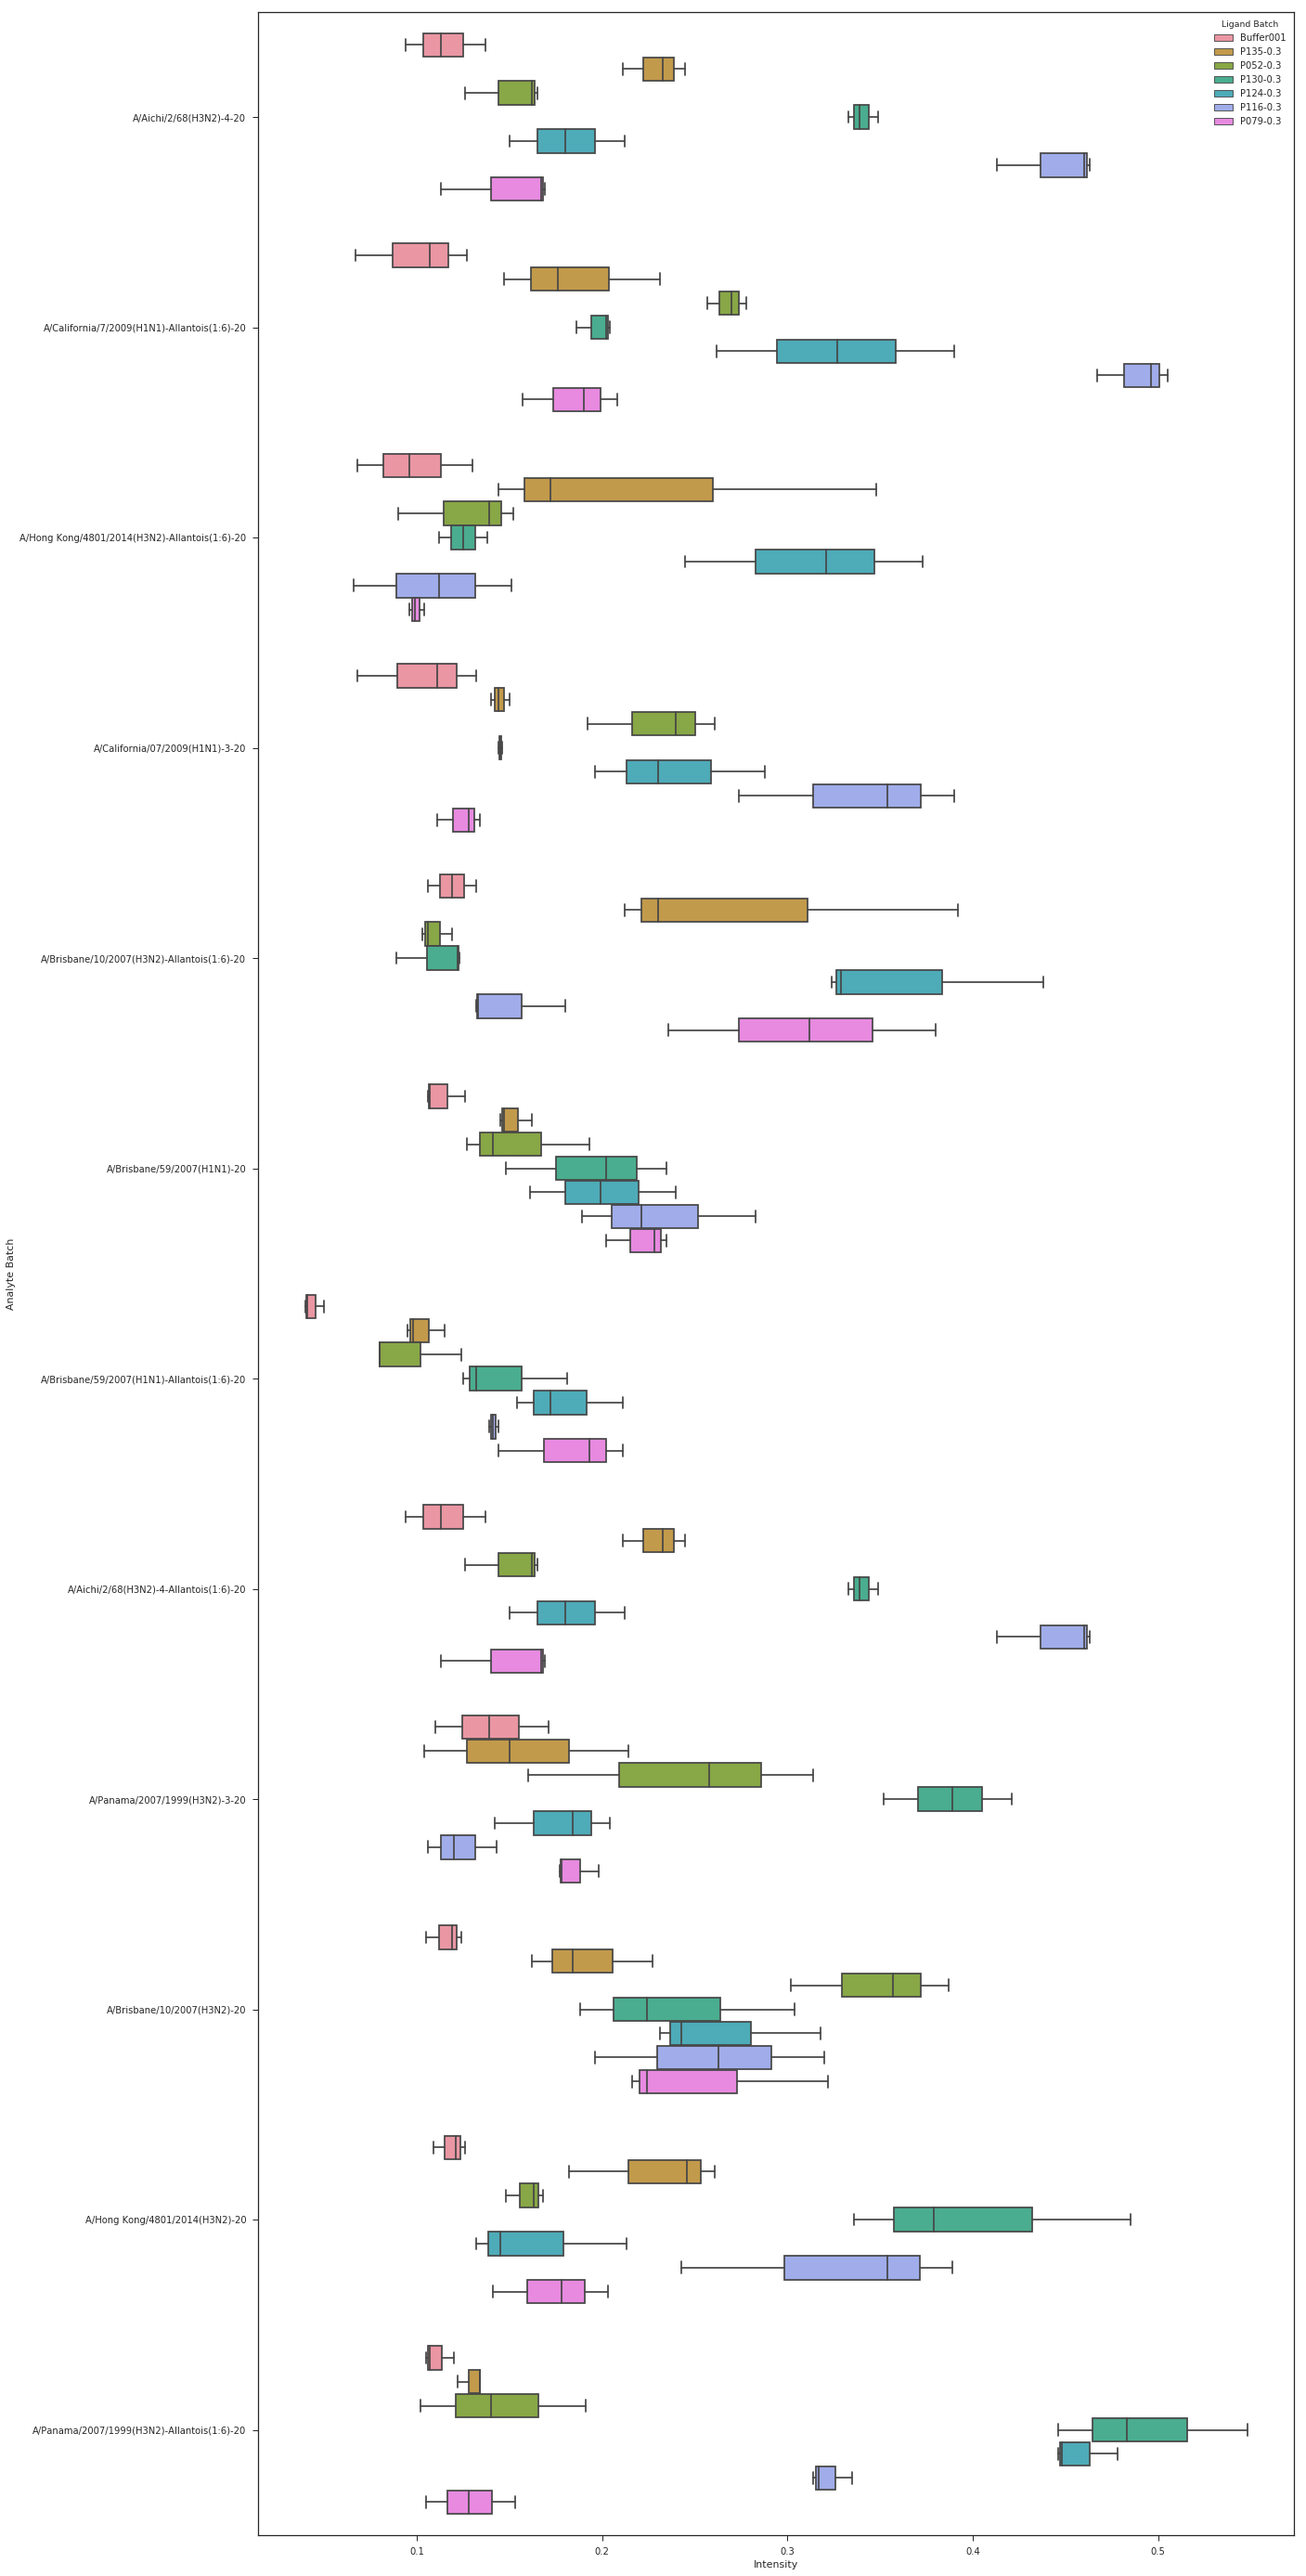

In [183]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(20,50))
ax = sns.boxplot(y="Analyte Batch",hue="Ligand Batch", x="Intensity", data=data1.spots_pd)


In [184]:
data = a2.Data(spots_dj=spots_dj)#.outlier_filtering().sample_on_collection(10).clean()


In [185]:
data.x

Ligand Batch                                                                Buffer001  \
Analyte Batch                                Collection            Replica              
A/Aichi/2/68(H3N2)-4-10                      2018_03_21-achi-1     6.0          0.165   
                                                                   7.0          0.160   
                                                                   8.0          0.095   
A/Aichi/2/68(H3N2)-4-20                      2018_03_21-achi-1     9.0          0.137   
                                                                   10.0         0.094   
                                                                   11.0         0.113   
A/Aichi/2/68(H3N2)-4-5                       2018_03_21-achi-1     3.0          0.127   
                                                                   4.0          0.222   
                                                                   5.0          0.149   
A/Aichi/2/68(H3N2)-4-Allantois(1:6)-10       2018_03_21-achi-2     6.0          0.165   
                                                                   7.0          0.160   
                                                                   8.0          0.095   
A/Aichi/2/68(H3N2)-4-Allantois(1:6)-20       2018_03_21-achi-2     9.0          0.137   
                                                                   10.0         0.094   
                                                                   11.0         0.113   
A/Aichi/2/68(H3N2)-4-Allantois(1:6)-5        2018_03_21-achi-2     3.0          0.127   
                                                                   4.0          0.222   
                                                                   5.0          0.149   
A/Aichi/2/68(H3N2)-EI                        2018_03_21-achi-1     1.0          0.275   
                                                                   2.0          0.252   
A/Aichi/2/68(H3N2)-EI-Genkopienzahl-10       2018_03_21-achi-2     1.0          0.275   
                                                                   2.0          0.252   
A/Brisbane/10/2007(H3N2)-10                  2018_03_21-bris10-1   6.0          0.143   
                                                                   7.0          0.146   
                                                                   8.0          0.126   
A/Brisbane/10/2007(H3N2)-20                  2018_03_21-bris10-1   9.0          0.105   
                                                                   10.0         0.119   
                                                                   11.0         0.124   
A/Brisbane/10/2007(H3N2)-5                   2018_03_21-bris10-1   3.0          0.111   
                                                                   4.0          0.076   
...                                                                               ...   
A/Panama/2007/1999(H3N2)-3-20                2018_03_21-pana-1     10.0         0.139   
                                                                   11.0         0.110   
A/Panama/2007/1999(H3N2)-3-5                 2018_03_21-pana-1     3.0          0.156   
                                                                   4.0          0.199   
                                                                   5.0          0.187   
A/Panama/2007/1999(H3N2)-Allantois(1:6)-10   2018_03_21-pana-2     6.0          0.115   
                                                                   7.0          0.119   
                                                                   8.0          0.164   
A/Panama/2007/1999(H3N2)-Allantois(1:6)-20   2018_03_21-pana-2     9.0          0.105   
                                                                   10.0         0.120   
                                                                   11.0         0.107   
A/Panama/2007/1999(H3N2)-Allantois(1:6)-5    2018_03_21-pana-2     3.0          0.06

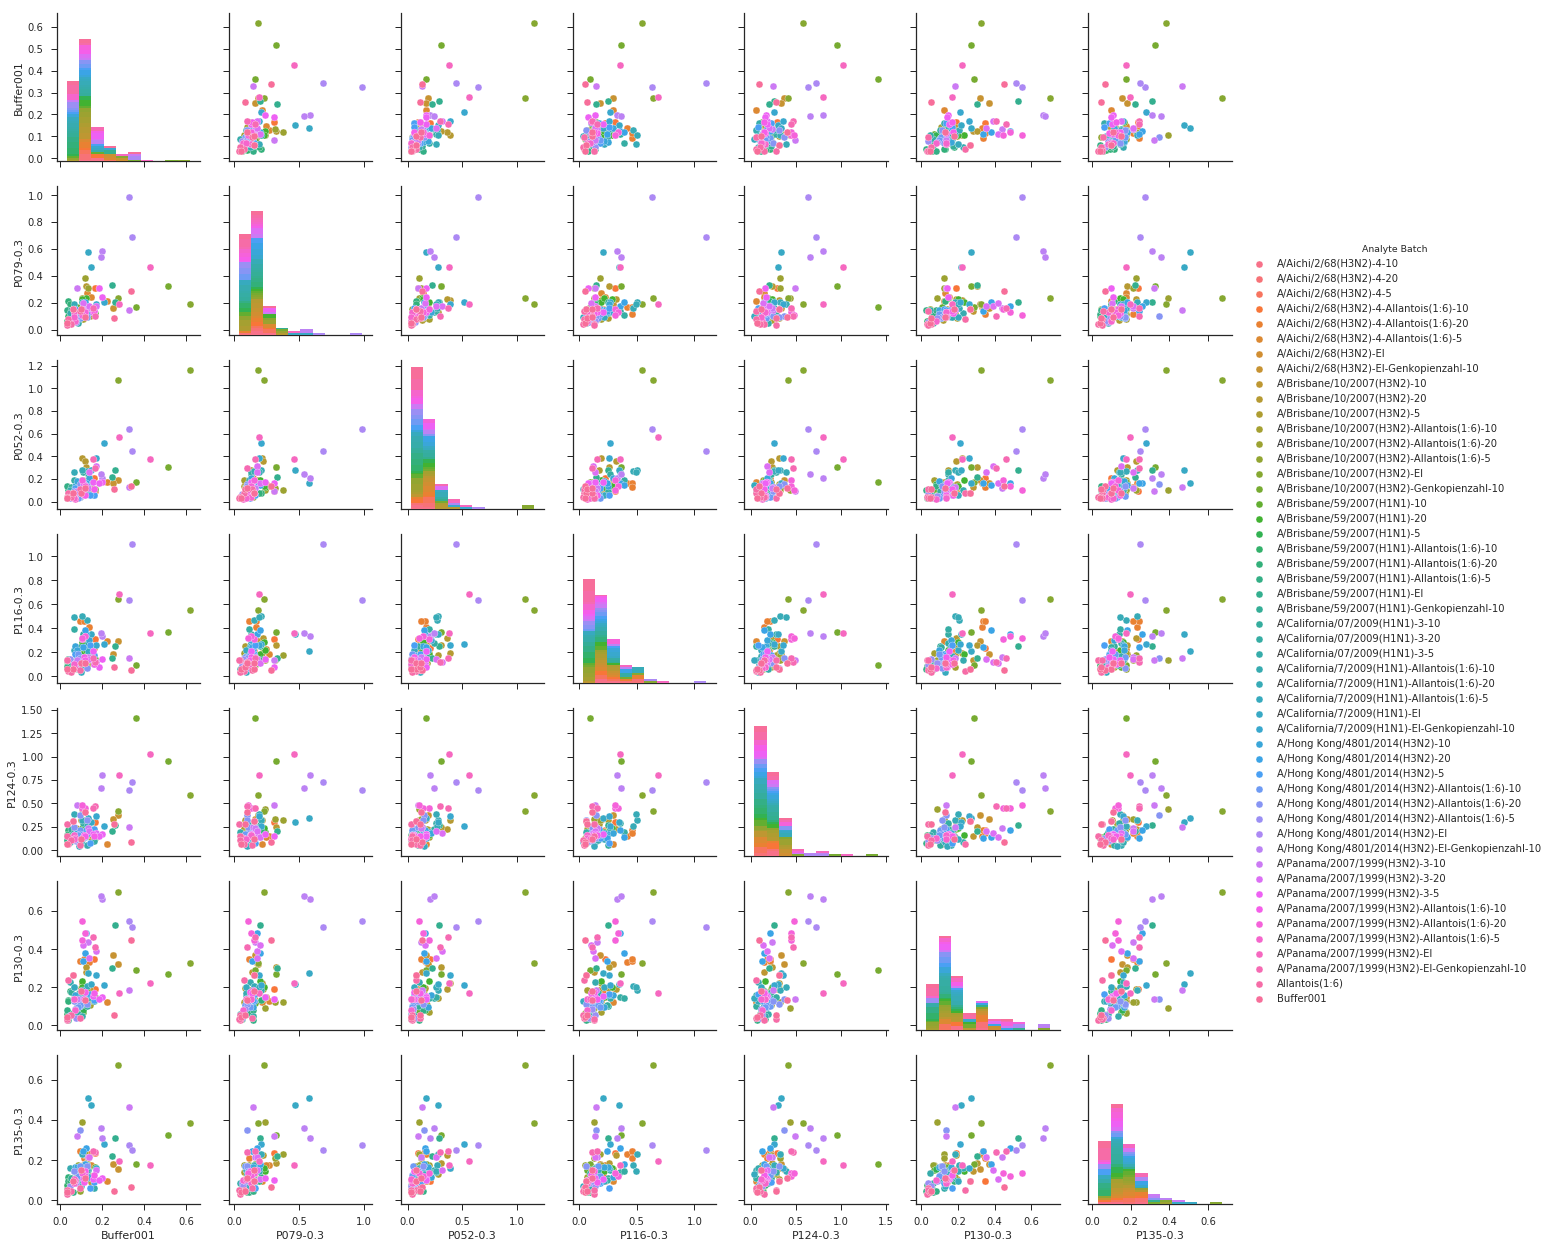

In [186]:
sns.pairplot(data=data.x.reset_index(),vars=["Buffer001","P079-0.3","P052-0.3","P116-0.3","P124-0.3","P130-0.3","P135-0.3"], hue="Analyte Batch")

In [189]:
reload(a2)
data1 = a2.Data(spots_pd=data.spots_pd[data.spots_pd["Analyte Batch Concentraion"] == 10])


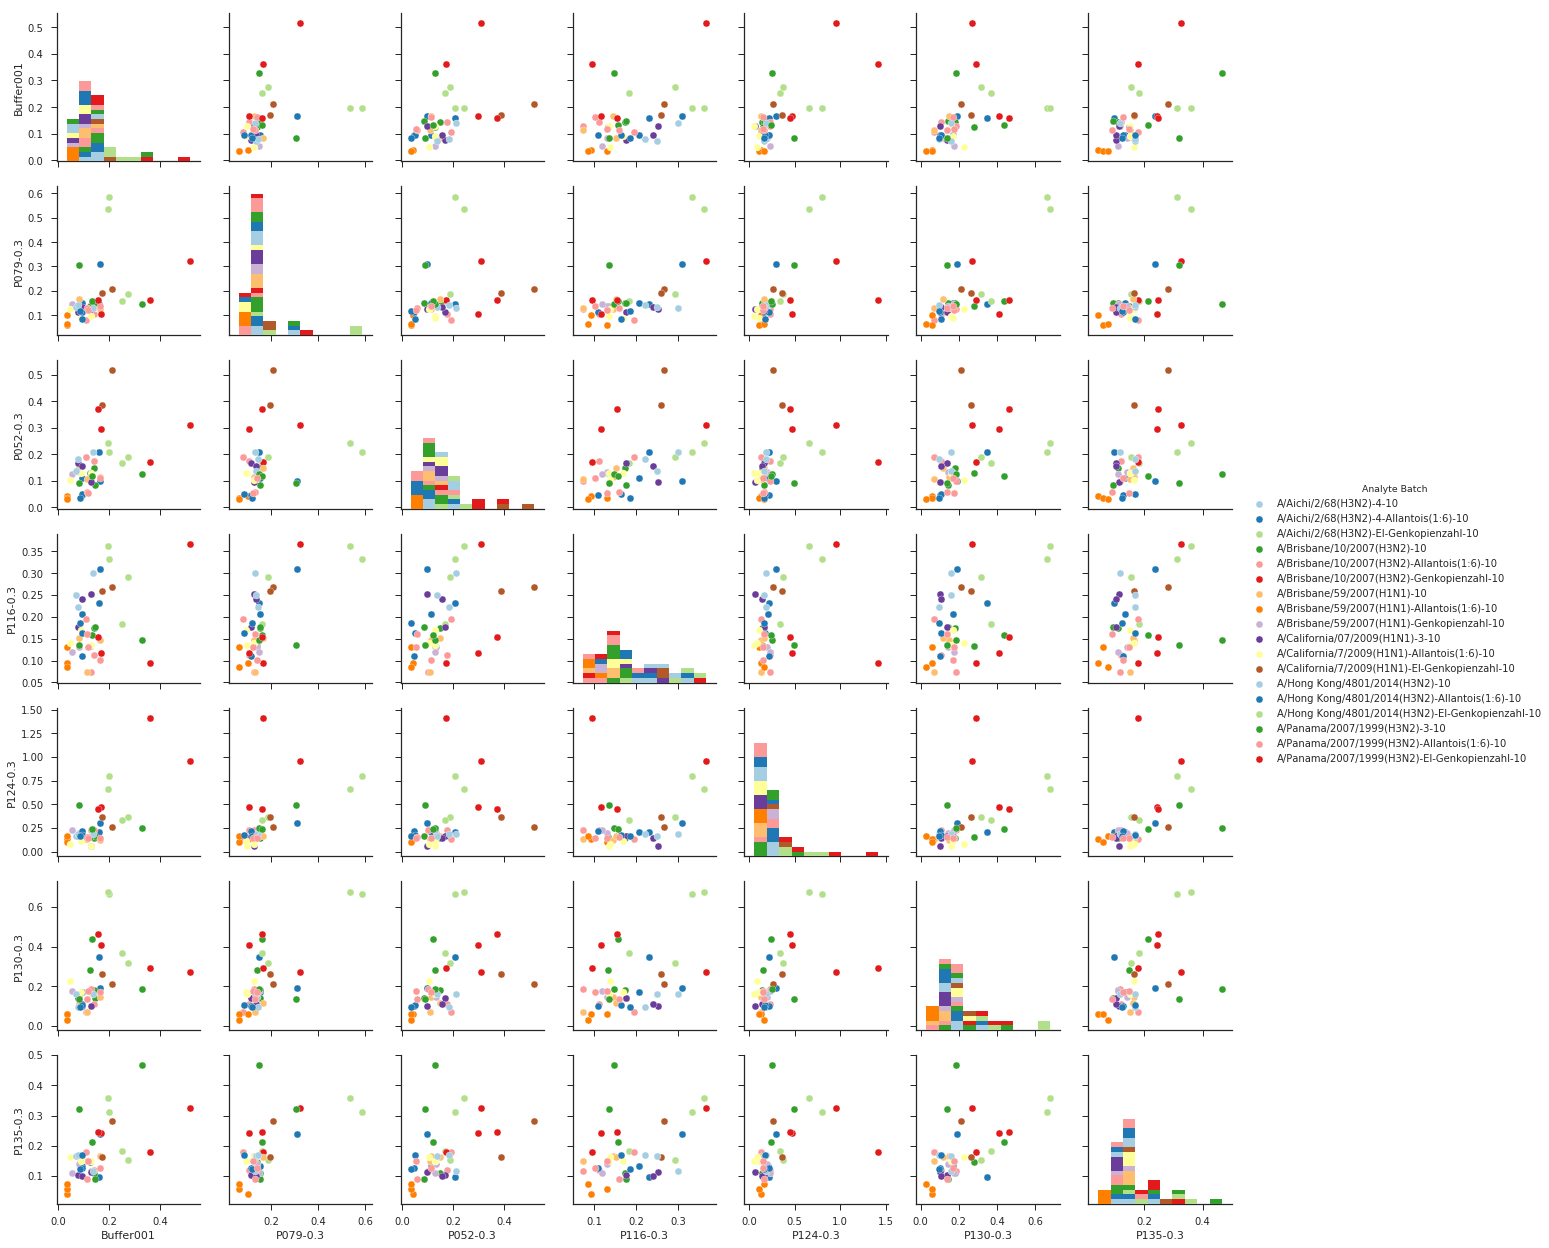

In [190]:
sns.pairplot(data=data1.x.reset_index(),vars=["Buffer001","P079-0.3","P052-0.3","P116-0.3","P124-0.3","P130-0.3","P135-0.3"], hue="Analyte Batch", palette="Paired", )    

In [191]:
dx = data1.spots_pd.pivot_table(values="Intensity",columns="Analyte Batch", index=["Ligand Batch", "Replica"])

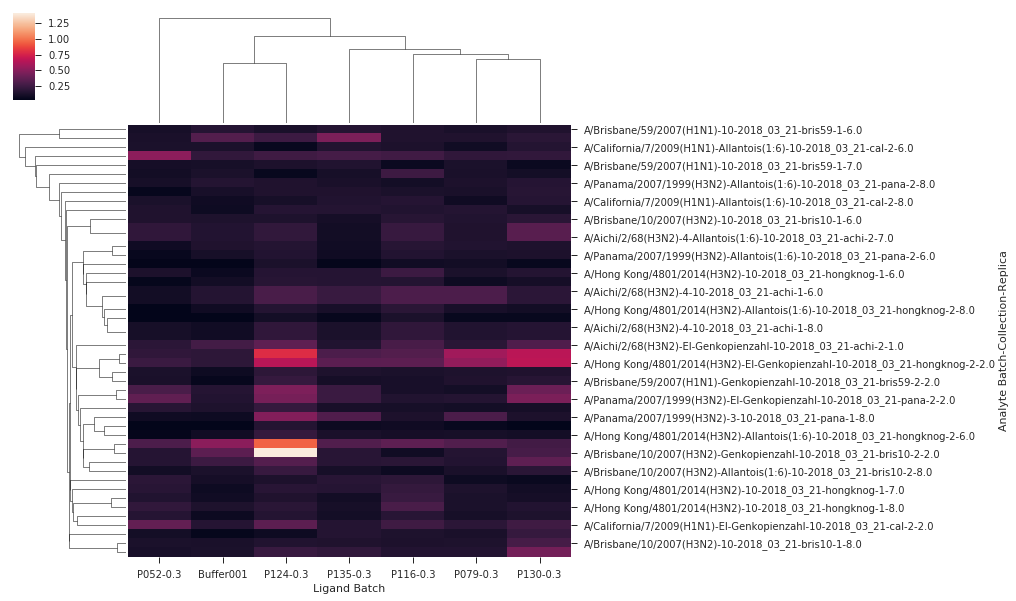

In [193]:
#fig, ax = plt.subplots( nrows=1, ncols=1,figsize=(10,10))
ax=sns.clustermap(data1.x, method="single",metric="correlation")